In [32]:
# Miniprojekt f(x) = (x + 444427) mod 8

In [33]:
# Z własności modulo (x + 444427) mod 8 = (x mod 8 + 444427 mod 8) mod 8 = (x mod 8 + 3) mod 8. 
# Zatem f(x) = (x + 444427) mod 8 = (x + 3) mod 8

In [41]:
# from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

from qiskit.quantum_info import random_statevector

from qiskit import Aer
from qiskit import assemble

from qiskit.visualization import plot_histogram

In [50]:
qr = QuantumRegister(3)
cr1 = ClassicalRegister(1, name = 'cr1')
cr2 = ClassicalRegister(1, name = 'cr2')
cr3 = ClassicalRegister(1, name = 'cr3')
mod = QuantumCircuit(qr, cr1, cr2, cr3)

#Losujemy losowy kubit
# psi = random_statevector(2)
# mod.initialize(psi, 0)

mod.x(0)
mod.x(1)
# mod.x(2)

mod.barrier()

mod.x(0)
mod.cx(0,1)
mod.x(2)
mod.ccx(0, 1,2)

mod.barrier()

mod.measure(0,0)
mod.measure(1,1)
mod.measure(2,2)

mod.draw()

┌───┐ ░ ┌───┐           ░ ┌─┐      
q16_0: ┤ X ├─░─┤ X ├──■────■───░─┤M├──────
       ├───┤ ░ └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q16_1: ┤ X ├─░──────┤ X ├──■───░──╫─┤M├───
       └───┘ ░ ┌───┐└───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q16_2: ──────░─┤ X ├─────┤ X ├─░──╫──╫─┤M├
             ░ └───┘     └───┘ ░  ║  ║ └╥┘
cr1: 1/═══════════════════════════╩══╬══╬═
                                  0  ║  ║ 
                                     ║  ║ 
cr2: 1/══════════════════════════════╩══╬═
                                     0  ║ 
                                        ║ 
cr3: 1/═════════════════════════════════╩═
                                        0

{'1 1 0': 1000}


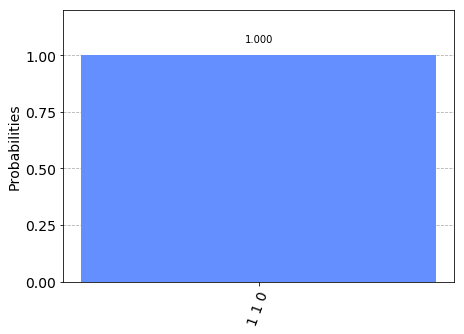

In [51]:
symulator_mod = Aer.get_backend('qasm_simulator')
qobj_mod = assemble(mod, shots=1000)
wyniki_mod = symulator_mod.run(qobj_mod)

hist_mod = wyniki_mod.result().get_counts()
print(hist_mod)

plot_histogram(hist_mod)